In [0]:
from zipfile import ZipFile

f = '/content/drive/My Drive/chest-xray-pneumonia.zip'
with ZipFile(f, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [0]:
from fastai import *
from fastai.vision import *

In [0]:
path = Path("/content/chest_xray/chest_xray")

In [0]:
data = ImageDataBunch.from_folder(path, train='train', test='test', valid='val', size=225).normalize(imagenet_stats)

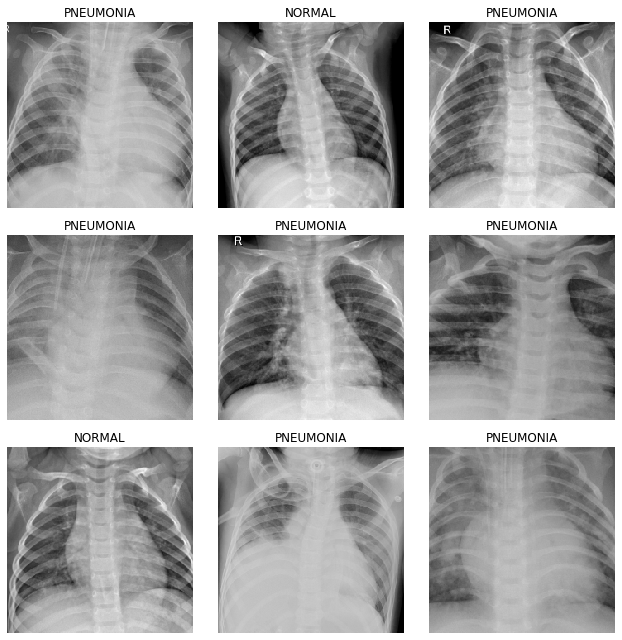

In [0]:
data.show_batch(3, figsize=(9, 9))

In [0]:
model = create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
model.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 2.09E-03
Min loss divided by 10: 1.74E-02


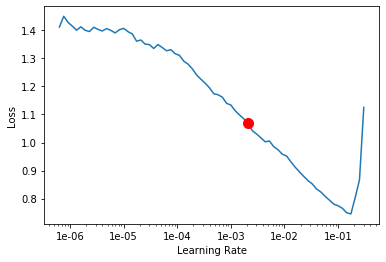

In [0]:
model.recorder.plot(suggestion=True)

In [0]:
lr = 1e-03

model.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,error_rate,time
0,0.551748,0.473190,0.125000,02:45
1,0.257956,0.341321,0.125000,02:45
2,0.164783,0.246867,0.062500,02:44
3,0.091689,0.384676,0.125000,02:45
4,0.071851,0.365799,0.125000,02:44


In [0]:
#interprete the mdel
interpretation_from_model = ClassificationInterpretation.from_learner(model)


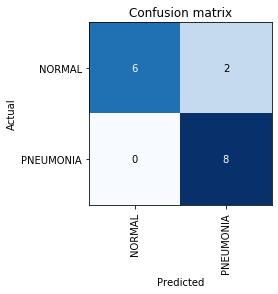

In [0]:
#plot the confusion_matrix
interpretation_from_model.plot_confusion_matrix()


In [0]:
#deleting images which are not prevent
losses, idxs = interpretation_from_model.top_losses()
top_loss_paths = data.valid_ds.x[idxs]


In [0]:
model

Learner(data=ImageDataBunch;

Train: LabelList (5216 items)
x: ImageList
Image (3, 225, 225),Image (3, 225, 225),Image (3, 225, 225),Image (3, 225, 225),Image (3, 225, 225)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: /content/chest_xray/chest_xray;

Valid: LabelList (16 items)
x: ImageList
Image (3, 225, 225),Image (3, 225, 225),Image (3, 225, 225),Image (3, 225, 225),Image (3, 225, 225)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: /content/chest_xray/chest_xray;

Test: LabelList (624 items)
x: ImageList
Image (3, 225, 225),Image (3, 225, 225),Image (3, 225, 225),Image (3, 225, 225),Image (3, 225, 225)
y: EmptyLabelList
,,,,
Path: /content/chest_xray/chest_xray, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=

In [0]:
model.unfreeze()

In [0]:
model.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


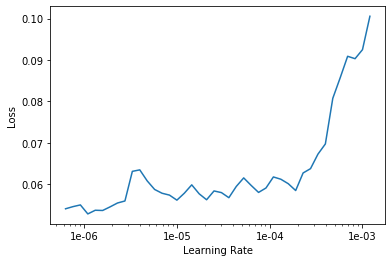

In [0]:
model.recorder.plot()

In [0]:
lr = slice(1e-05, 1e-04)
model.fit_one_cycle(10, max_lr=lr)

epoch,train_loss,valid_loss,error_rate,time
0,0.059610,0.325184,0.062500,02:48
1,0.045386,0.238042,0.125000,02:47
2,0.027706,0.398120,0.062500,02:47
3,0.019003,0.331150,0.062500,02:46
4,0.016344,0.215857,0.062500,02:45
5,0.008964,0.249939,0.062500,02:46
6,0.005147,0.414259,0.062500,02:51
7,0.002789,0.374244,0.062500,02:50
8,0.001945,0.479630,0.125000,02:48
9,0.001661,0.324283,0.062500,02:48


In [0]:
interpretation_from_model = ClassificationInterpretation.from_learner(model)


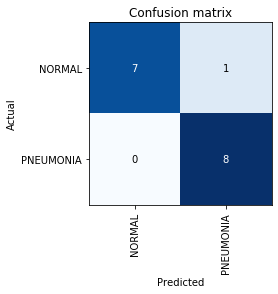

In [0]:
interpretation_from_model.plot_confusion_matrix()